In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text.latex', preamble = r'\usepackage[helvet]{sfmath} \usepackage{sansmathfonts}')

%config InlineBackend.figure_format = 'retina'

In [2]:
#Load TOV class
from tovsolver.tov import *
from tovsolver.constants import *

In [3]:
#Here we load EoS to be used in calculations
names = ['T', 'muB', 'muQ', 'muS', 'muL',
       'nB', 'nQ', 'nS', 'nL', 'p', 
       'en', 's', 'f_ev', 'sigma', 
       'z', 'pol', 'o', 'r', 'phi']

out_directory = "/home/mtrn/CLionProjects/thermo/cmake-build-debug/"
CMF_NS_eos = np.genfromtxt(out_directory+"T0_NS_1_11.dat", names=names)

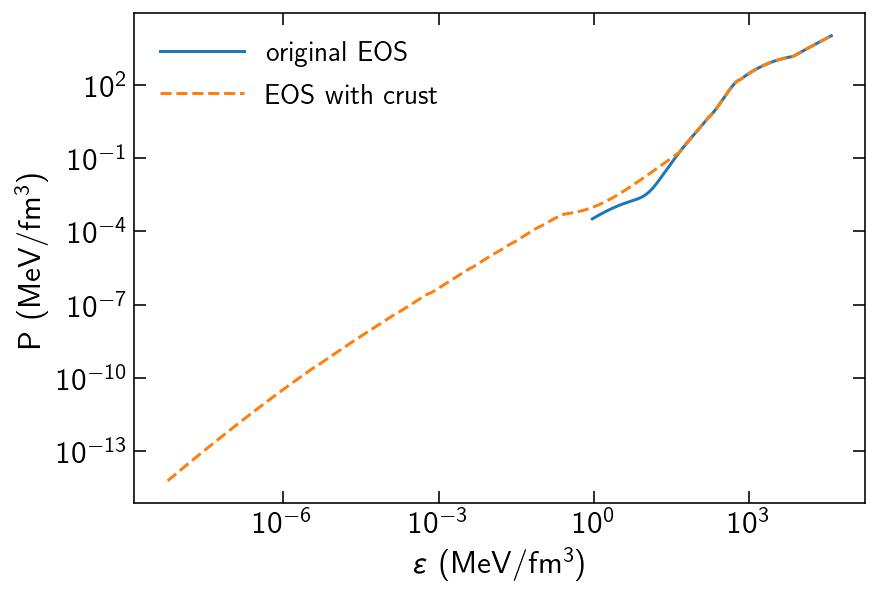

In [4]:
n_arr, p_arr = CMF_NS_eos['en'], CMF_NS_eos['p']

#initialization of TOVsolver
tov_s = TOV(n_arr, p_arr, plot_eos=True)

In [6]:
m_arr = []
R_arr = []

for dens_c in np.logspace(-0,3.7,350):
    R, M, prof = tov_s.solve(dens_c, rmax=50e5, dr=100)
    m_arr.append(M)
    R_arr.append(R)

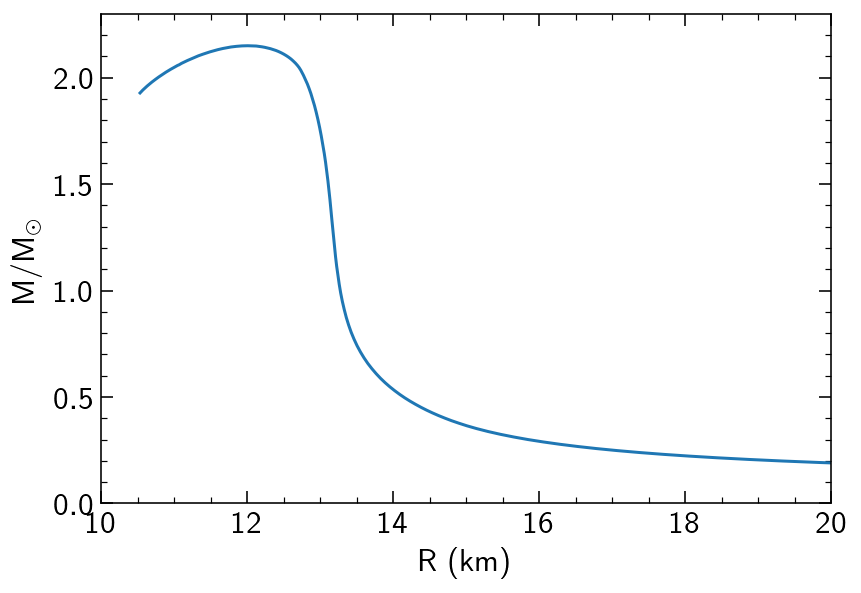

In [7]:
plt.plot(R_arr, m_arr)

plt.xlim(10,20)
plt.ylim(0,2.3)

plt.ylabel(r'${\rm M/M_\odot}$')
plt.xlabel(r'${\rm R~(km)}$')

plt.show()

In [8]:
#Here we calculate tidal propertis of the NS family

m_arr = []
R_arr = []

L_arr = []
k2_arr = []
C_arr = []

for dens_c in np.logspace(-0,3.7,150):
    NS_prop = tov_s.solve_tidal(dens_c, rmax=50e5)
    R, M, C, k2, y, beta, H = NS_prop[0], NS_prop[1], NS_prop[2], NS_prop[3], NS_prop[4], NS_prop[5], NS_prop[6]
    L_arr.append(2/3*k2/C**5)
    k2_arr.append(k2)
    C_arr.append(C)
    R_arr.append(R)
    m_arr.append(M)

/usr/local/lib/python3.8/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


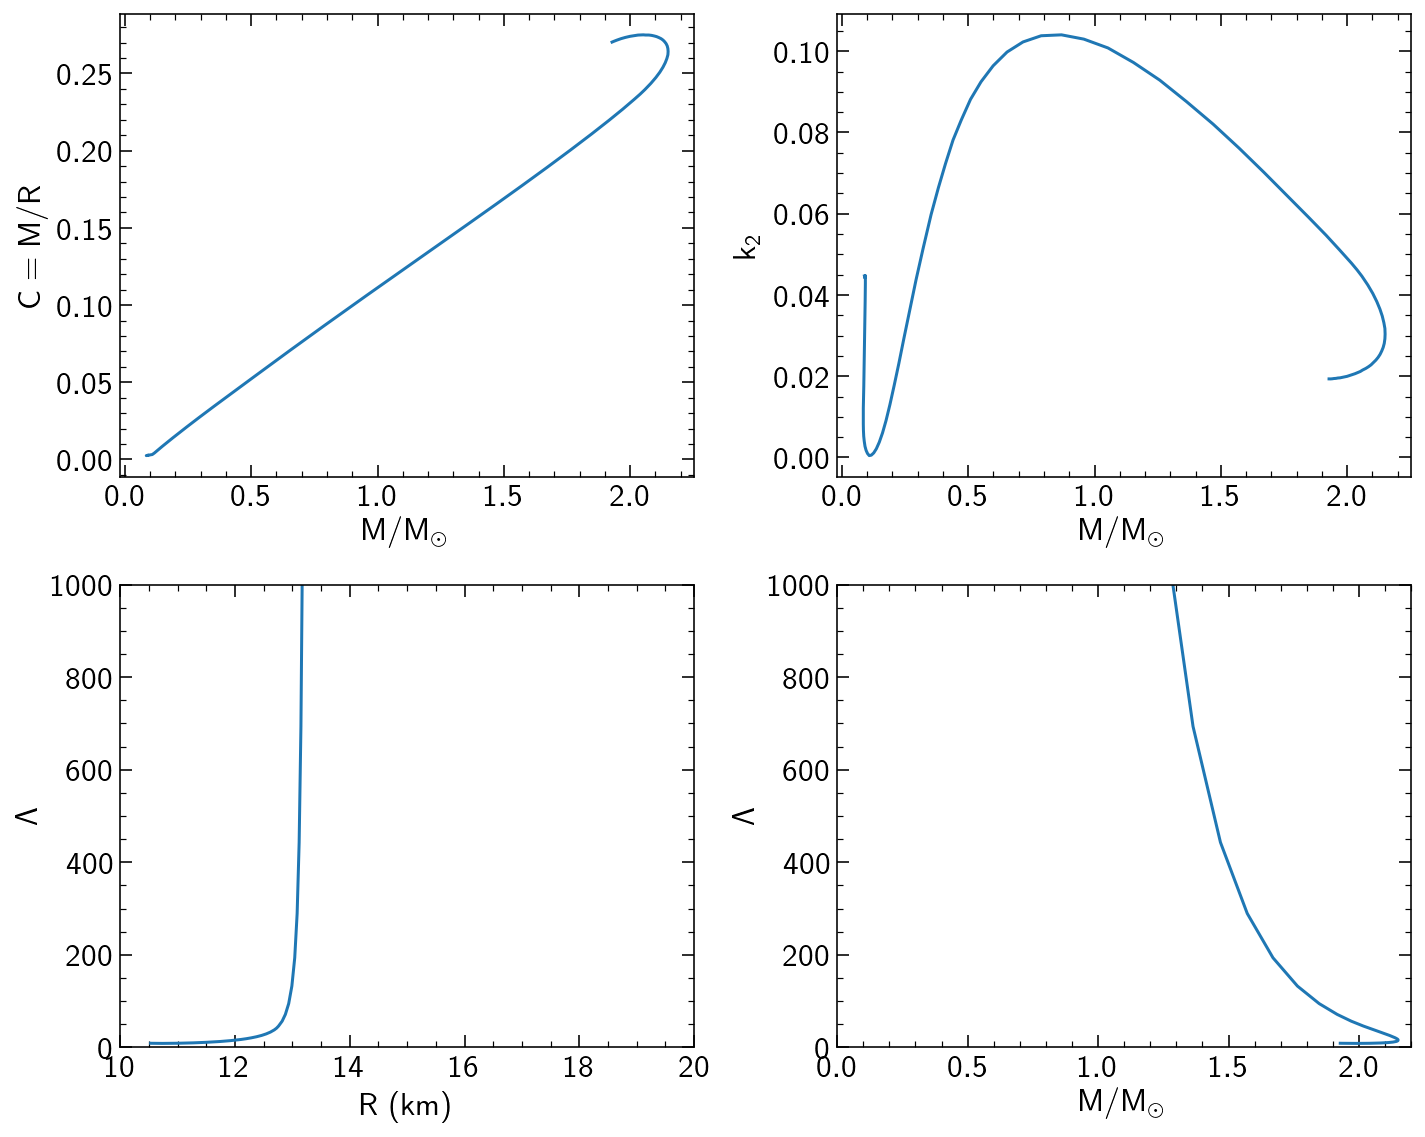

In [9]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(221)

ax1.plot(m_arr, C_arr)
ax1.set_xlabel(r'${\rm M/M_\odot}$')
ax1.set_ylabel(r'${\rm C=M/R}$')

ax2 = fig.add_subplot(222)

ax2.plot(m_arr, k2_arr)
ax2.set_xlabel(r'${\rm M/M_\odot}$')
ax2.set_ylabel(r'${\rm k_2}$')

ax3 = fig.add_subplot(223)

ax3.plot(R_arr, L_arr)
ax3.set_xlabel(r'${\rm R~(km)}$')
ax3.set_ylabel(r'${\rm \Lambda}$')
ax3.set_xlim(10,20)
ax3.set_ylim(0,1000)

ax4 = fig.add_subplot(224)

ax4.plot(m_arr, L_arr)
ax4.set_xlabel(r'${\rm M/M_\odot}$')
ax4.set_ylabel(r'${\rm \Lambda}$')
ax4.set_xlim(0,2.2)
ax4.set_ylim(0,1000)

plt.tight_layout()

plt.show()